In [214]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [215]:
import cv2
print(cv2.__version__)

4.10.0


In [216]:
path = "D://Users//user//Downloads//RCNN//RCNN-master//RCNN-master//Images//Images"
annot = "D://Users//user//Downloads//RCNN//RCNN-master//RCNN-master//Airplanes_Annotations//Airplanes_Annotations"

airplane_001.jpg


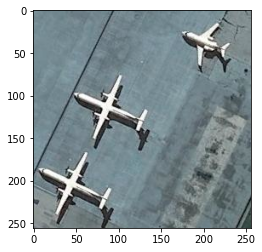

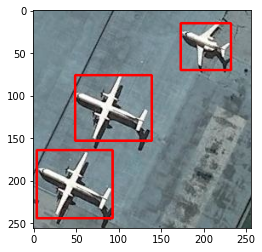

In [217]:
for e,i in enumerate(os.listdir(annot)):
    if e < 10:
        filename = i.split(".")[0]+".jpg"
        print(filename)
        img = cv2.imread(os.path.join(path,filename))
        df = pd.read_csv(os.path.join(annot,i))
        plt.imshow(img)
        for row in df.iterrows():
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        break

In [218]:
#pip uninstall opencv-contrib-python opencv-python

In [219]:
#!pip install opencv-contrib-python 

In [220]:
from cv2.ximgproc import segmentation
#from cv2.ximgproc.segmentation import createSelectiveSearchSegmentation


In [221]:
import cv2
import cv2.ximgproc.segmentation

print(dir(cv2.ximgproc.segmentation))

['GraphSegmentation', 'SelectiveSearchSegmentation', 'SelectiveSearchSegmentationStrategy', 'SelectiveSearchSegmentationStrategyColor', 'SelectiveSearchSegmentationStrategyFill', 'SelectiveSearchSegmentationStrategyMultiple', 'SelectiveSearchSegmentationStrategySize', 'SelectiveSearchSegmentationStrategyTexture', '__doc__', '__loader__', '__name__', '__package__', '__spec__', 'createGraphSegmentation', 'createSelectiveSearchSegmentation', 'createSelectiveSearchSegmentationStrategyColor', 'createSelectiveSearchSegmentationStrategyFill', 'createSelectiveSearchSegmentationStrategyMultiple', 'createSelectiveSearchSegmentationStrategySize', 'createSelectiveSearchSegmentationStrategyTexture']


In [222]:
from cv2.ximgproc.segmentation import createSelectiveSearchSegmentation

In [223]:
cv2.setUseOptimized(True);
#ss = segmentation.createSelectiveSearchSegmentation()
ss = createSelectiveSearchSegmentation()


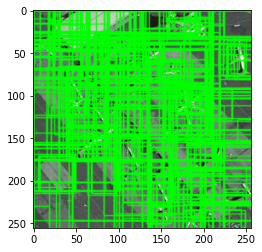

In [224]:
im = cv2.imread(os.path.join(path,"airplane_687.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)

In [225]:
train_images=[]
train_labels=[]

In [226]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [227]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [228]:
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 200 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (56,56), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (56,56), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 airplane_001.jpg
1 airplane_002.jpg
2 airplane_003.jpg
3 airplane_004.jpg
4 airplane_005.jpg
5 airplane_006.jpg
6 airplane_007.jpg
7 airplane_008.jpg
8 airplane_009.jpg
9 airplane_010.jpg
10 airplane_011.jpg
11 airplane_012.jpg
12 airplane_013.jpg
13 airplane_014.jpg
14 airplane_015.jpg
15 airplane_016.jpg
16 airplane_017.jpg
17 airplane_018.jpg
18 airplane_019.jpg
19 airplane_020.jpg
20 airplane_021.jpg
21 airplane_022.jpg
22 airplane_023.jpg
23 airplane_024.jpg
24 airplane_025.jpg
25 airplane_026.jpg
26 airplane_027.jpg
27 airplane_028.jpg
28 airplane_029.jpg
29 airplane_030.jpg
30 airplane_031.jpg
31 airplane_032.jpg
32 airplane_033.jpg
33 airplane_034.jpg
34 airplane_035.jpg
35 airplane_036.jpg
36 airplane_037.jpg
37 airplane_038.jpg
38 airplane_039.jpg
39 airplane_040.jpg
40 airplane_041.jpg
41 airplane_042.jpg
42 airplane_043.jpg
43 airplane_044.jpg
44 airplane_045.jpg
45 airplane_046.jpg
46 airplane_047.jpg
47 airplane_048.jpg
48 airplane_049.jpg
49 airplane_050.jpg
50 airplan

In [229]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [230]:
X_new.shape

(14459, 56, 56, 3)

In [231]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [232]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [234]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [236]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
])

In [237]:
# for layers in (vggmodel.layers)[:15]:
#     print(layers)
#     layers.trainable = False

In [238]:
X= model.layers[-2].output

In [239]:
predictions = Dense(2, activation="softmax")(X)

In [240]:
model_final = Model(inputs = model.input, outputs = predictions)

In [241]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

D:\Users\user\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [242]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [243]:
model_final.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15_input (InputLayer  [(None, 56, 56, 3)]      0         
 )                                                               
                                                                 
 conv2d_15 (Conv2D)          (None, 54, 54, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 27, 27, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                           

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [245]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [246]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [247]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [248]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(13013, 56, 56, 3) (1446, 56, 56, 3) (13013, 2) (1446, 2)


In [249]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [250]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [251]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [252]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 1000, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

C:\Users\user\AppData\Local\Temp\ipykernel_25660\3734971591.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 1000, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])


Epoch 1/1000
10/10 [==============================] - ETA: 0s - loss: 3.2904 - accuracy: 0.6500
Epoch 1: val_loss improved from inf to 2.82910, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 4s 236ms/step - loss: 3.2904 - accuracy: 0.6500 - val_loss: 2.8291 - val_accuracy: 0.5156
Epoch 2/1000
10/10 [==============================] - ETA: 0s - loss: 1.1638 - accuracy: 0.8188
Epoch 2: val_loss improved from 2.82910 to 0.88793, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 2s 188ms/step - loss: 1.1638 - accuracy: 0.8188 - val_loss: 0.8879 - val_accuracy: 0.7656
Epoch 3/1000
10/10 [==============================] - ETA: 0s - loss: 0.7233 - accuracy: 0.8094
Epoch 3: val_loss did not improve from 0.88793
10/10 [==============================] - 2s 169ms/step - loss: 0.7233 - accuracy: 0.8094 - val_loss: 1.1224 - val_accuracy: 0.8906
Epoch 4/1000
10/10 [==============================] - ETA: 0s - loss: 0.8382 - accuracy: 0.8000
Epoc

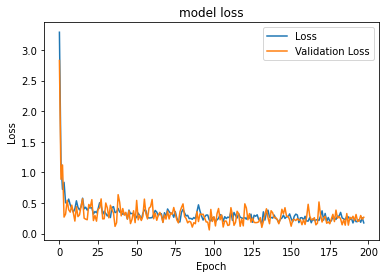

<Figure size 432x288 with 0 Axes>

In [253]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

1/1 [==============================] - 0s 203ms/step
not plane


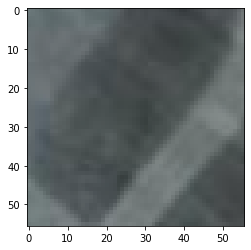

In [254]:
im = X_test[160]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("plane")
else:
    print("not plane")

1/1 [==============================] - 0s 94ms/step


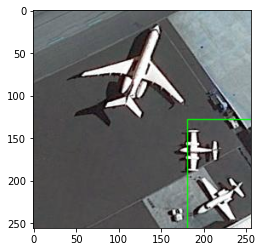

In [258]:
z=0
for e,i in enumerate(os.listdir(path)):
    if i.startswith("airplane_007"):
        z += 1
        img = cv2.imread(os.path.join(path,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e,result in enumerate(ssresults):
            if e < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (256,256), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][0] > 0.65:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)

In [210]:
# for e,i in enumerate(os.listdir(path)):
#     print(i)

airplane_001.jpg
airplane_002.jpg
airplane_003.jpg
airplane_004.jpg
airplane_005.jpg
airplane_006.jpg
airplane_007.jpg
airplane_008.jpg
airplane_009.jpg
airplane_010.jpg
airplane_011.jpg
airplane_012.jpg
airplane_013.jpg
airplane_014.jpg
airplane_015.jpg
airplane_016.jpg
airplane_017.jpg
airplane_018.jpg
airplane_019.jpg
airplane_020.jpg
airplane_021.jpg
airplane_022.jpg
airplane_023.jpg
airplane_024.jpg
airplane_025.jpg
airplane_026.jpg
airplane_027.jpg
airplane_028.jpg
airplane_029.jpg
airplane_030.jpg
airplane_031.jpg
airplane_032.jpg
airplane_033.jpg
airplane_034.jpg
airplane_035.jpg
airplane_036.jpg
airplane_037.jpg
airplane_038.jpg
airplane_039.jpg
airplane_040.jpg
airplane_041.jpg
airplane_042.jpg
airplane_043.jpg
airplane_044.jpg
airplane_045.jpg
airplane_046.jpg
airplane_047.jpg
airplane_048.jpg
airplane_049.jpg
airplane_050.jpg
airplane_051.jpg
airplane_052.jpg
airplane_053.jpg
airplane_054.jpg
airplane_055.jpg
airplane_056.jpg
airplane_057.jpg
airplane_058.jpg
airplane_059.j